<a href="https://colab.research.google.com/github/larguesa/FRL-CD-AM2/blob/main/FRL_CD_AM2_03_2_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 3.2(2) Regressão: Dataset Boston Housing

Objetivo: Prever o preço de casas em Boston (regressão).

Passos:
1. Carregamento e Exploração dos Dados
2. Pré-processamento
3. Treinamento de Modelos: modelo base: Regressão Linear; modelos avançados: Random Forest Regressor e XGBoost.
4. Visualização dos Resultados

## Roteiro de execução

1. Carregamento e Exploração dos Dados

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


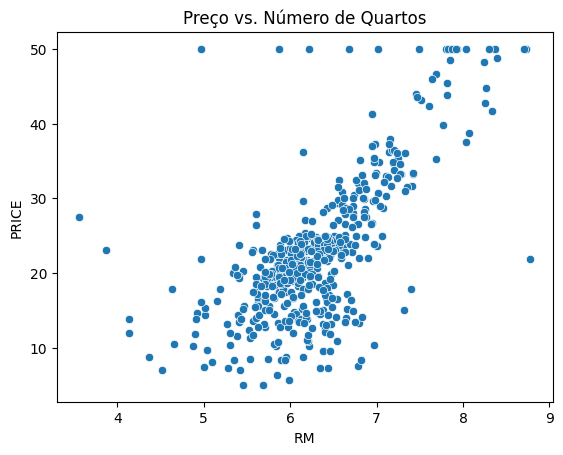

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Baixar o dataset da fonte original
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Criar o DataFrame
df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
df['PRICE'] = target

# Visualizar
print(df.head())
sns.scatterplot(x='RM', y='PRICE', data=df)
plt.title('Preço vs. Número de Quartos')
plt.show()

2. Pré-processamento

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar o dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Separar variáveis
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Verificar valores ausentes
print("Valores ausentes em X:\n", X.isna().sum())

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar o resultado
print("Primeiras 5 linhas de X_train_scaled:\n", X_train_scaled[:5])

Valores ausentes em X:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Primeiras 5 linhas de X_train_scaled:
 [[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.14515634 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   0.08662432 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]


3. Treinamento de Modelos
- Modelo base: Regressão Linear.
- Modelos avançados: Random Forest Regressor e XGBoost.

In [ ]:
from sklearn.model_selection import train_test_split  # Importação adicionada
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Divisão em treino e teste usando X_scaled do passo anterior
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("MAE Regressão Linear:", mean_absolute_error(y_test, y_pred_lr))
print("R² Regressão Linear:", r2_score(y_test, y_pred_lr))

# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print("MAE Random Forest:", mean_absolute_error(y_test, y_pred_rfr))
print("R² Random Forest:", r2_score(y_test, y_pred_rfr))

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("MAE XGBoost:", mean_absolute_error(y_test, y_pred_xgb))
print("R² XGBoost:", r2_score(y_test, y_pred_xgb))

MAE Regressão Linear: 0.5332001304956565
R² Regressão Linear: 0.5757877060324511
MAE Random Forest: 0.32761306601259704
R² Random Forest: 0.805024407701793
MAE XGBoost: 0.30957335413783094
R² XGBoost: 0.8301370561019205


4. Visualização dos Resultados

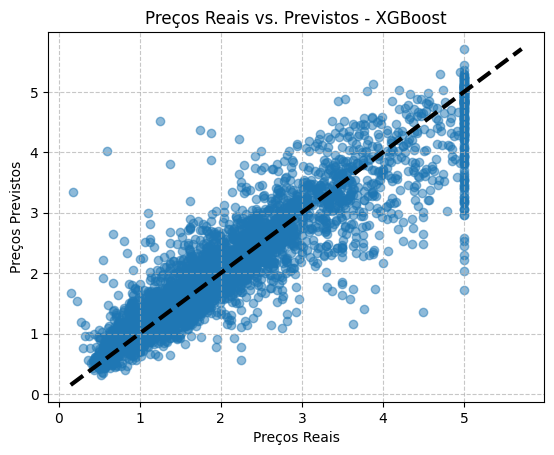

MAE XGBoost: 0.30957335413783094
R² XGBoost: 0.8301370561019205


In [ ]:
import matplotlib.pyplot as plt  # Adicionado explicitamente
from sklearn.metrics import mean_absolute_error, r2_score  # Já importado antes, mas mantido para contexto

# Gráfico de dispersão
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
min_val = min(y_test.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=3)  # Linha preta mais visível
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs. Previstos - XGBoost')
plt.grid(True, linestyle='--', alpha=0.7)  # Grade para melhor visualização
plt.show()

# Métricas
print("MAE XGBoost:", mean_absolute_error(y_test, y_pred_xgb))
print("R² XGBoost:", r2_score(y_test, y_pred_xgb))

## Exercício

Adicione uma transformação logarítmica à variável alvo (`PRICE`) e reavalie o modelo XGBoost. Comente suas ações e quais resultados obteve.
### Exercício complementar opcional
Experimente o dataset California Housing (`from sklearn.datasets import fetch_california_housing`).